In [38]:
import numpy as np
import matplotlib.pyplot as plt

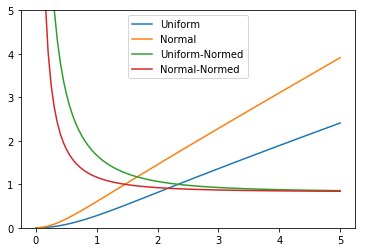

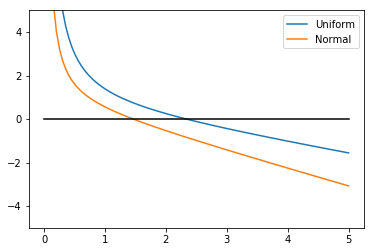

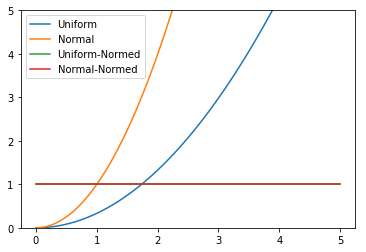

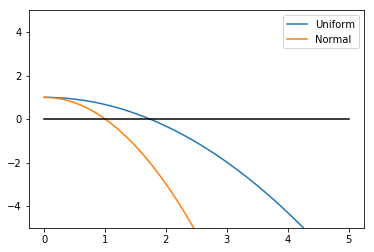

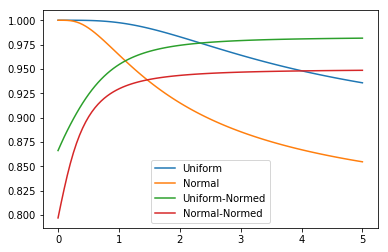

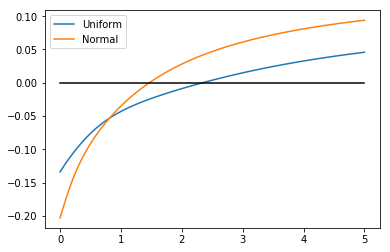

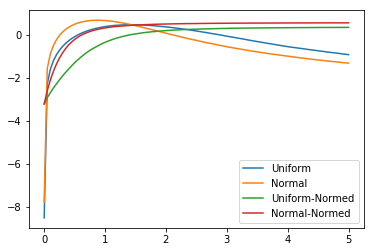

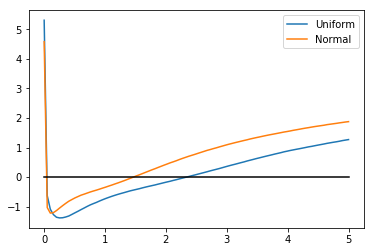

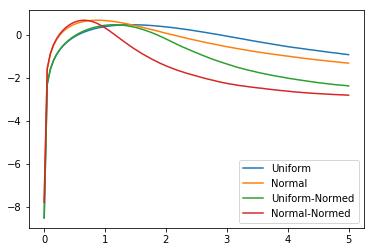

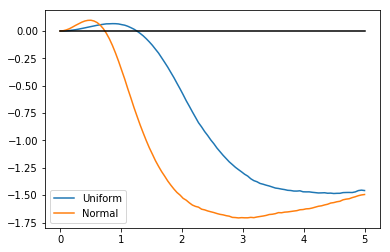

In [39]:
BS = 10000
du = np.random.rand(BS)*2-1
dn = np.random.randn(BS)

samples = 100

def cov(u,v):
    muU = u.mean()
    muV = v.mean()
    return ((u-muU)*(v-muV)).mean()

def cor(u,v):
    c = cov(u,v)
    sigu = np.sqrt(cov(u,u))
    sigv = np.sqrt(cov(v,v))
    return c/(sigu*sigv)

sigs = np.linspace(0.0001, 5, samples)
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 0] = cov(tu, ou)
    data[i, 1] = cov(tn, on)
    
    tu = tu/data[i, 0]
    tn = tn/data[i, 1]
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = cov(tu, ou)
    data[i, 3] = cov(tn, on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
plt.ylim((-5, 5))
plt.legend()
plt.show()
    

# BN version
    
    
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    data[i, 0] = cov(tu, tu)
    data[i, 1] = cov(tn, tn)
    
    tu = tu/np.sqrt(data[i, 0])
    tn = tn/np.sqrt(data[i, 1])
    
    data[i, 2] = cov(tu, tu)
    data[i, 3] = cov(tn, tn)
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
plt.ylim((-5, 5))
plt.legend()
plt.show()
    
    
# Measuring correlation
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)
    cn = cov(tn, on)
    
    data[i, 0] = cor(tu,ou)
    data[i, 1] = cor(tn,on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = cor(tu,ou)
    data[i, 3] = cor(tn,on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()



# Measuring Entropy
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)
    cn = cov(tn, on)
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()


# Measuring Entropy
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)/cov(tu,tu)
    cn = cov(tn, on)/cov(tn,tn)
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()

/home/tbjackso/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: divide by zero encountered in true_divide
  return n/db/n.sum(), bin_edges
/home/tbjackso/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/opt/anaconda/envs/tbj/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in multiply
  # This is added back by InteractiveShellApp.init_path()


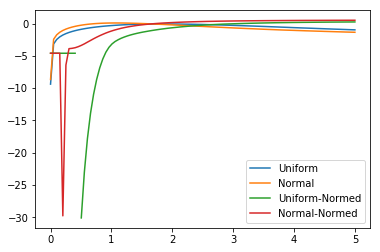

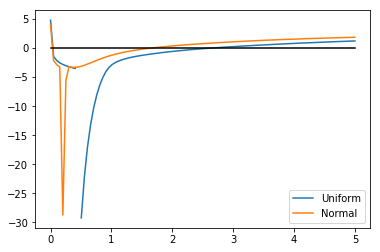

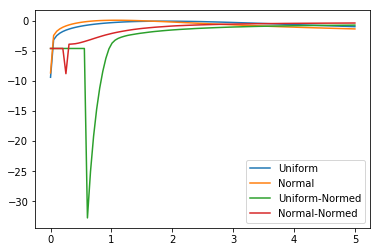

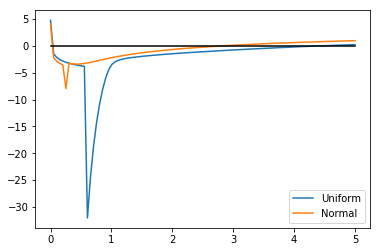

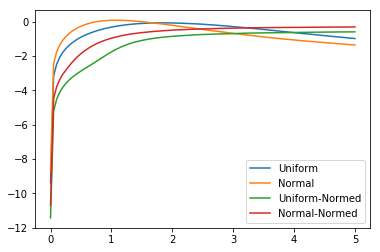

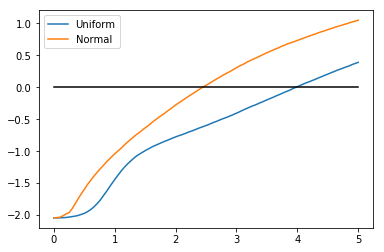

In [40]:
sig = 3
mu = 1

# Measuring Entropy
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig + mu
    tn = dn*sig + mu
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)
    cn = cov(tn, on)
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()


# Measuring Entropy
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig + mu
    tn = dn*sig + mu
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)/2
    cn = cov(tn, on)/2
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()




# Measuring Entropy
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig + mu
    tn = dn*sig + mu
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = EXY(tu, ou)/2
    cn = EXY(tn, on)/2
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()

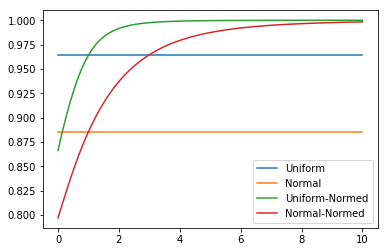

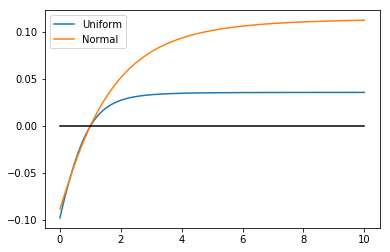

In [41]:

sigs = np.linspace(0.0001, 10, samples)

data = np.zeros((samples, 4))
msig = 3

for i, sig in enumerate(sigs):
    tu = du*msig
    tn = dn*msig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)
    cn = cov(tn, on)
    
    data[i, 0] = cor(tu,ou)
    data[i, 1] = cor(tn,on)
    
    tu = tu/sig
    tn = tn/sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = cor(tu,ou)
    data[i, 3] = cor(tn,on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()

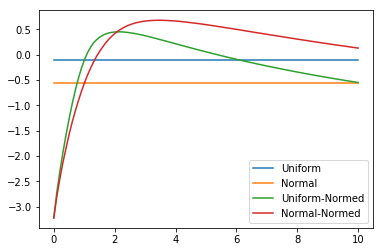

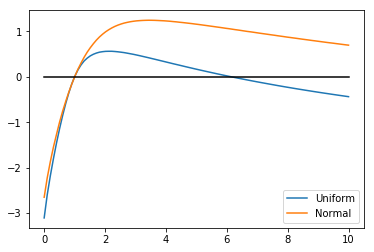

In [42]:
def hist_ent(A):
    [bh, be] = np.histogram(A, bins=100, density=True)
    
    bw = np.abs(be[1:]-be[:-1])
#     print (bw)

#     print ((bh*bw).sum())
#     print (np.log(bh+0.00000000000001))
    
    # Entropy formula p(x)*log(p(x))*dx
    H = -1*(bh*np.log(bh+0.00000000000001)*bw).sum()
    return H

BS = 10000
du = np.random.rand(BS)*2-1
dn = np.random.randn(BS)

samples = 100

sigs = np.linspace(0.0001, 10, samples)

data = np.zeros((samples, 4))
msig = 3

for i, sig in enumerate(sigs):
    tu = du*msig
    tn = dn*msig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)
    cn = cov(tn, on)
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/sig
    tn = tn/sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()

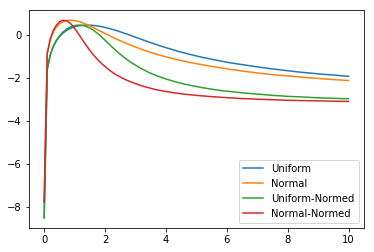

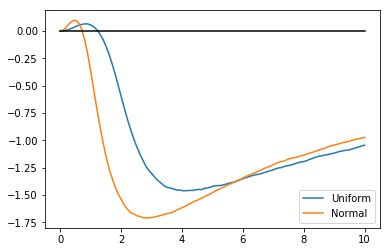

In [43]:

# Measuring Entropy
data = np.zeros((samples, 4))

for i, sig in enumerate(sigs):
    tu = du*sig
    tn = dn*sig
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    cu = cov(tu, ou)/cov(tu,tu)
    cn = cov(tn, on)/cov(tn,tn)
    
    data[i, 0] = hist_ent(ou)
    data[i, 1] = hist_ent(on)
    
    tu = tu/cu
    tn = tn/cn
    
    ou = np.tanh(tu)
    on = np.tanh(tn)
    
    data[i, 2] = hist_ent(ou)
    data[i, 3] = hist_ent(on)
    
    
plt.plot(sigs, data[:,0], label='Uniform')
plt.plot(sigs, data[:,1], label='Normal')
plt.plot(sigs, data[:,2], label='Uniform-Normed')
plt.plot(sigs, data[:,3], label='Normal-Normed')
# plt.ylim((0, 5))
plt.legend()
plt.show()

plt.plot(sigs, data[:,2] - data[:,0], label='Uniform')
plt.plot(sigs, data[:,3] - data[:,1], label='Normal')
plt.plot(sigs, np.zeros_like(sigs), 'k')
# plt.ylim((-5, 5))
plt.legend()
plt.show()

In [44]:
def incremental(x, NSteps, lr=0.01, use_cov=True):
    w = 1
    w0 = 0
    results = np.zeros((NSteps,3))
    for i in range(NSteps):
        u = w * x + w0
        
        y = np.tanh(u)

        E = hist_ent(y)

        results[i,0] = E
        results[i,1] = w
        results[i,2] = w0

        if (use_cov):
            delw = (1/w)-2*cov(x,y)
            delw = (1/w)*(1-2*EXY(x, np.tanh(x))) # Not True
            delw = (1/w)-2*EXY(x, x)/np.abs(w*(1-np.mean(y**2))) # Also wrong...
            delw = (1/w)-2*EXY(x, x/(1-y**2))/np.abs(w) # also not right?
            delw = (1/w)-cov(u,u)/cov(u,y)
#             delw = (1/w)-1/cov(u,y)
        else:
            delw = (1/w)-2*EXY(x,y)

        delw0 = -2*np.mean(y)

        w = w +  lr * delw
        w0 = w0 + lr * delw0

    return results

In [45]:


def EXY(x,y):
    return np.mean(x*y)

def incremental2(x, NSteps, lr=0.01, use_cov=True):
    w = 1
    w0 = 0
    results = np.zeros((NSteps,3))
    for i in range(NSteps):
        u = (x - w0) / w
#         u = w * x + w0
        
        y = np.tanh(u)

        E = hist_ent(y)

        results[i,0] = E
        results[i,1] = w
        results[i,2] = w0

        if (use_cov):
            w = (1-lr)*w + lr*np.sqrt(cov(x,x))
            w0= (1-lr)*w0 + lr*(x.mean().item())
        else:
            w = (1-lr)*w + lr*2*EXY(x,y)
            w0= (1-lr)*w0 + lr*2*y.mean().item()

    return results

In [46]:
def incremental3(x, NSteps, lr=0.01, use_cov=True):
    w = 1
    w0 = 0
    results = np.zeros((NSteps,3))
    for i in range(NSteps):
        u =  (x - w0)/w
        
        y = np.tanh(u)

        E = hist_ent(y)

        results[i,0] = E
        results[i,1] = w
        results[i,2] = w0

        
        w = 1/(1/w +lr*(w-2*EXY(x,y)))
        w0=
        
        delw = lr*((1/w)-2*EXY(x,y))
        w = w-w**2*delw
        w0 = w0+lr*w*2*np.mean(y)

    return results

SyntaxError: invalid syntax (<ipython-input-46-de9c2f9dca6b>, line 18)

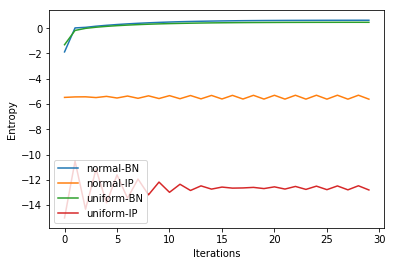

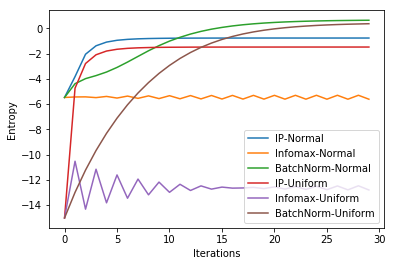

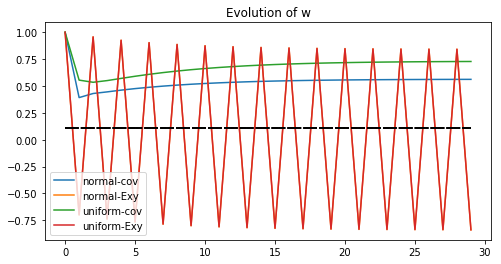

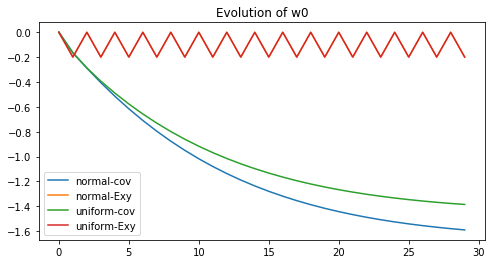

In [63]:
sig = 2
mu = 9

NSteps = 30

BS = 10000
du = np.random.rand(BS)*2-1
dn = np.random.randn(BS)

du = sig*du + mu
dn = sig*dn + mu

covdu = 1/EXY(du, np.tanh(du))
covdn = 1/EXY(dn, np.tanh(dn))

lr = 0.1

# r1 = incremental(dn, NSteps, lr=lr, use_cov=True)
r2 = incremental(dn, NSteps, lr=lr, use_cov=False)
# r3 = incremental(du, NSteps, lr=lr, use_cov=True)
r4 = incremental(du, NSteps, lr=lr, use_cov=False)


r12 = incremental2(dn, NSteps, lr=lr, use_cov=True)
r22 = incremental2(dn, NSteps, lr=lr, use_cov=False)
r32 = incremental2(du, NSteps, lr=lr, use_cov=True)
r42 = incremental2(du, NSteps, lr=lr, use_cov=False)


# r23 = incremental3(dn, NSteps, lr=lr)
# r43 = incremental3(du, NSteps, lr=lr)




plt.figure(figsize=(6,4))
plt.plot(r1[:,0], label='normal-BN')
plt.plot(r2[:,0], label='normal-IP')
plt.plot(r3[:,0], label='uniform-BN')
plt.plot(r4[:,0], label='uniform-IP')
plt.legend()
plt.ylabel('Entropy')
plt.xlabel('Iterations')
# plt.title("Evolution of Entropy")
plt.show()

plt.figure(figsize=(6,4))
plt.plot(r22[:,0], label='IP-Normal')
plt.plot(r2[:,0], label='Infomax-Normal')
plt.plot(r12[:,0], label='BatchNorm-Normal')
plt.plot(r42[:,0], label='IP-Uniform')
plt.plot(r4[:,0], label='Infomax-Uniform')
plt.plot(r32[:,0], label='BatchNorm-Uniform')
# plt.plot(r23[:,0], label='IP-Norm')
# plt.plot(r43[:,0], label='IP-cb-uni')
plt.legend()
plt.ylabel('Entropy')
plt.xlabel('Iterations')
# plt.title("Evolution of Entropy")
plt.show()


plt.figure(figsize=(8,4))
plt.plot(r1[:,1], label='normal-cov')
plt.plot(r2[:,1], label='normal-Exy')
plt.plot(r3[:,1], label='uniform-cov')
plt.plot(r4[:,1], label='uniform-Exy')
plt.plot(np.ones_like(r1)*covdn, 'k-.')
plt.plot(np.ones_like(r1)*covdu, 'k--')
plt.legend()
plt.title("Evolution of w")
plt.show()


plt.figure(figsize=(8,4))
plt.plot(r1[:,2], label='normal-cov')
plt.plot(r2[:,2], label='normal-Exy')
plt.plot(r3[:,2], label='uniform-cov')
plt.plot(r4[:,2], label='uniform-Exy')
plt.legend()
plt.title("Evolution of w0")
plt.show()

In [65]:
sig = 2
mu = 1
M = 10

data = np.zeros((M,3))

NSteps = 300
lr = 0.1
BS = 10000
N = sig*np.random.randn(BS)

for mu in range(M):
    if (mu%10 == 0):
        print (mu)
    dn = N + mu


    r12 = incremental2(dn, NSteps, lr=lr, use_cov=True)
    r2 = incremental(dn, NSteps, lr=lr, use_cov=False)
    r22 = incremental2(dn, NSteps, lr=lr, use_cov=False)
    data[mu,:] = [r12[-1,0], r2[-1,0], r22[-1,0]]
    

0


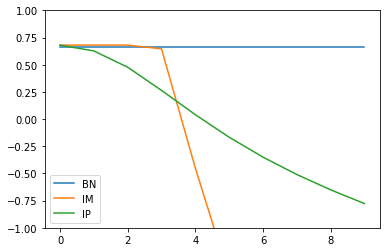

In [66]:
plt.plot(data[:,0], label='BN')
plt.plot(data[:,1], label='IM')
plt.plot(data[:,2], label='IP')
plt.legend()
plt.ylim(bottom=-1, top=1)
plt.show()